In [30]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Suppress FutureWarnings

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [31]:
train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [32]:
test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [33]:
train['loan_status'] = train['loan_status'].astype(str)
train['person_emp_length'] = train['person_emp_length'].astype(int)
# train = train.drop(['id'], axis=1)

In [34]:
num = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
cat = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00


In [36]:
train[train['person_age']>90]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7,PERSONAL,B,6700,10.75,0.18,N,4,0


In [37]:
train[train['person_emp_length']>50]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,49252,21,192000,MORTGAGE,123,VENTURE,B,20000,11.49,0.10,N,2,0


In [38]:
train = train.drop([47336,41079,49252], axis=0)

In [39]:
train['age_start_work'] = train['person_age'] - train['person_emp_length'] # should be positive or at least 18
train['age_start_credit'] = train['person_age'] - train['cb_person_cred_hist_length'] # should be positive or at least 18
train['emp_before_credit'] = train['person_emp_length'] - train['cb_person_cred_hist_length'] # should be positive

In [40]:
contains_inf = train.isin([np.inf, -np.inf]).any().any()
print(contains_inf)

False


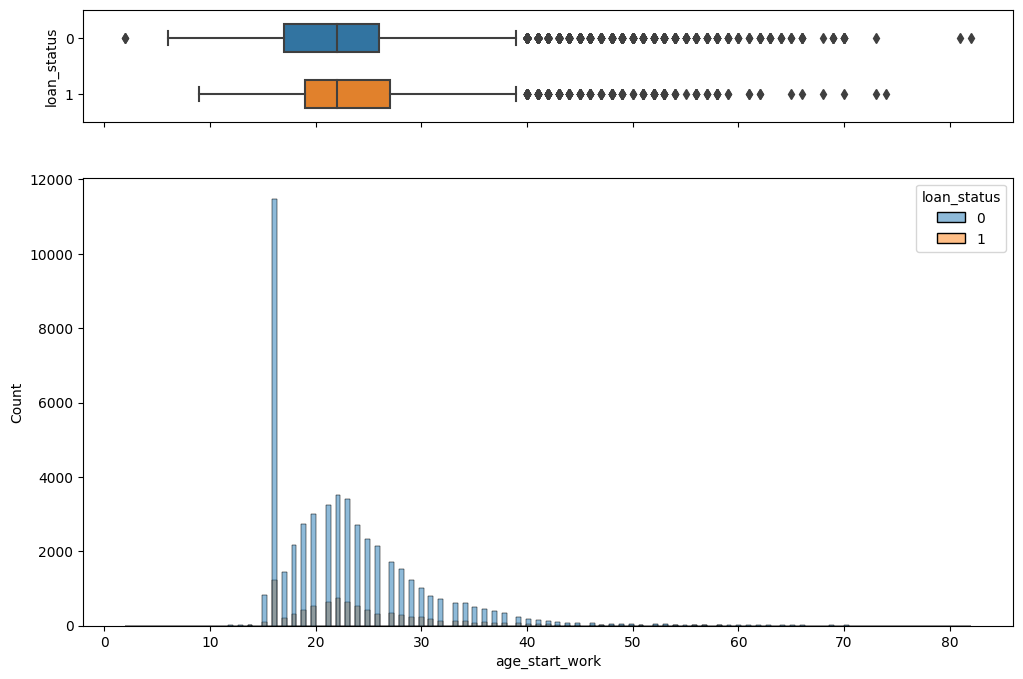

In [41]:
f, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12,8))
 
# assigning a graph to each ax
sns.boxplot(train, x='age_start_work', y='loan_status', orient='h', ax=ax_1, width=.5)
sns.histplot(train, x='age_start_work', hue='loan_status', ax=ax_2)
ax_1.set(xlabel="")
plt.show()

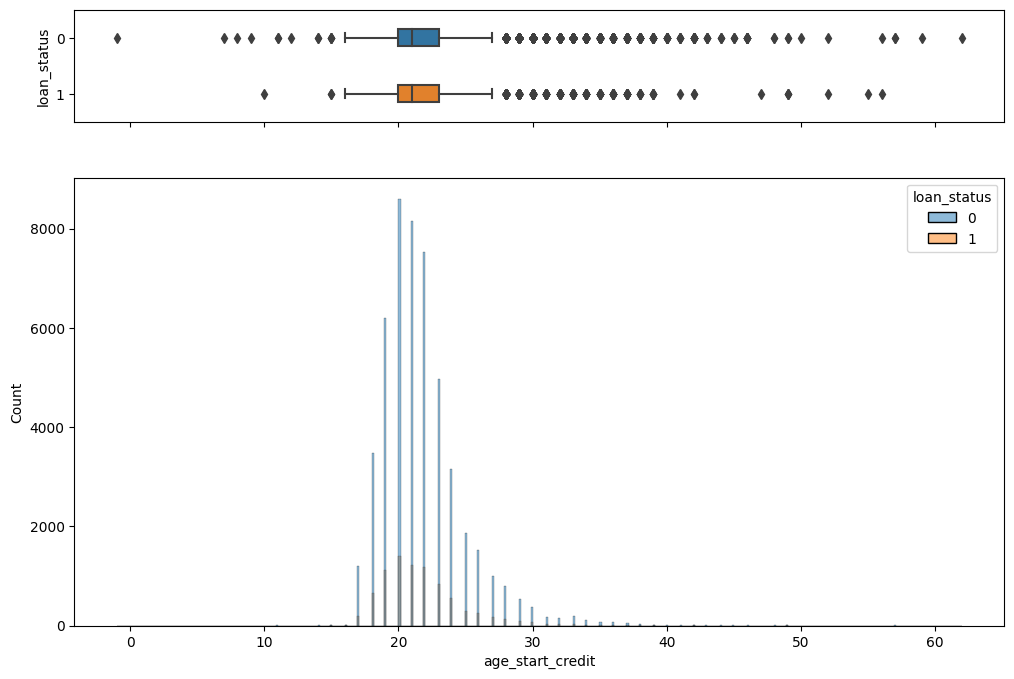

In [42]:
f, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12,8))
 
# assigning a graph to each ax
sns.boxplot(train, x='age_start_credit', y='loan_status', width=.3, orient='h', ax=ax_1)
sns.histplot(train, x='age_start_credit', hue='loan_status', ax=ax_2)
ax_1.set(xlabel="")
plt.show()

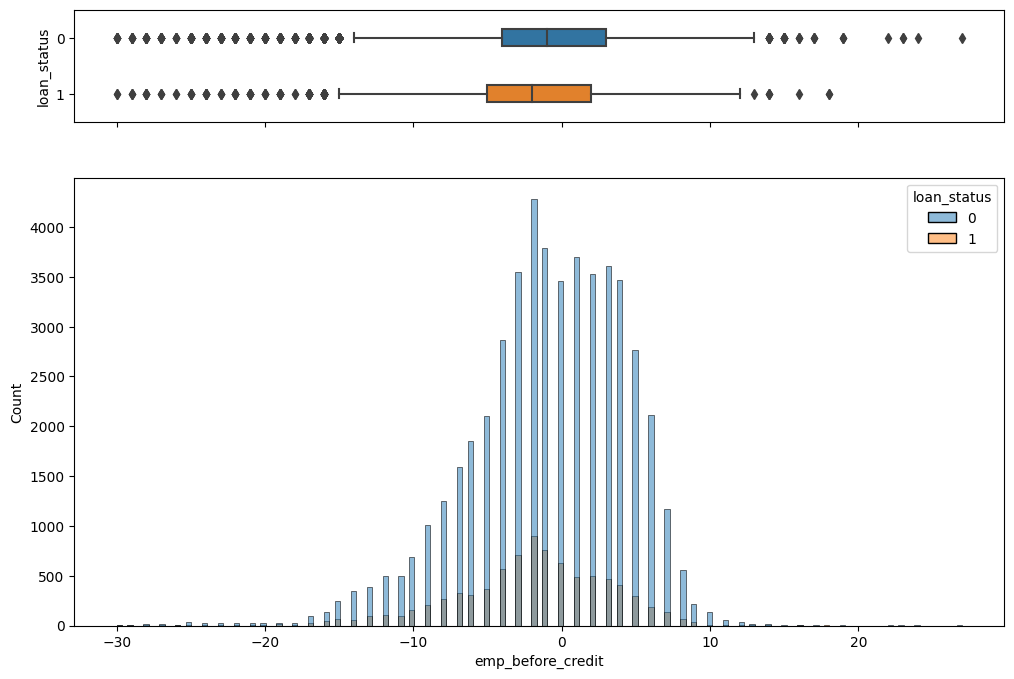

In [43]:
f, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12,8))
 
# assigning a graph to each ax
sns.boxplot(train, x='emp_before_credit', y='loan_status', width=.3, orient='h', ax=ax_1)
sns.histplot(train, x='emp_before_credit', hue='loan_status', ax=ax_2)
ax_1.set(xlabel="")
plt.show()

In [44]:
train_base = train.copy()

In [45]:
feature = train_base.columns.drop('loan_status')
X_train = train_base[feature]
y_train = train_base['loan_status']
X_train = pd.get_dummies(X_train, columns=cat)

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Define the model
model_base = DecisionTreeRegressor(random_state=1)

# Fit the model
model_base.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [47]:
test['age_start_work'] = test['person_age'] - test['person_emp_length'] # should be positive or at least 18
test['age_start_credit'] = test['person_age'] - test['cb_person_cred_hist_length'] # should be positive or at least 18
test['emp_before_credit'] = test['person_emp_length'] - test['cb_person_cred_hist_length'] # should be positive
X_test = pd.get_dummies(test, columns=cat)

In [48]:
X_test

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,age_start_work,age_start_credit,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,58645,23,69000,3.0,25000,15.76,0.36,2,20.0,21,...,False,False,False,False,False,False,True,False,True,False
1,58646,26,96000,6.0,10000,12.68,0.10,4,20.0,22,...,False,False,False,True,False,False,False,False,False,True
2,58647,26,30000,5.0,4000,17.19,0.13,2,21.0,24,...,True,False,False,False,False,True,False,False,False,True
3,58648,33,50000,4.0,7000,8.90,0.14,7,29.0,26,...,False,True,False,False,False,False,False,False,True,False
4,58649,26,102000,8.0,15000,16.32,0.15,4,18.0,22,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,2.0,3000,10.37,0.10,4,20.0,18,...,False,False,True,False,False,False,False,False,True,False
39094,97739,22,48000,6.0,7000,6.03,0.15,3,16.0,19,...,False,True,False,False,False,False,False,False,True,False
39095,97740,51,60000,0.0,15000,7.51,0.25,25,51.0,26,...,False,True,False,False,False,False,False,False,True,False
39096,97741,22,36000,4.0,14000,15.62,0.39,4,18.0,18,...,False,False,False,False,True,False,False,False,False,True


In [49]:
# Predict target
preds = model_base.predict(X_test)

In [50]:
preds

array([1., 0., 1., ..., 0., 0., 1.])

In [55]:
submission = pd.DataFrame({'id': X_test.id,
                          'loan_status': preds}, 
                          )

submission

,id,loan_status
0,58645,1.0
1,58646,0.0
2,58647,1.0
3,58648,1.0
4,58649,0.0
...,...,...
39093,97738,0.0
39094,97739,0.0
39095,97740,0.0
39096,97741,0.0


In [56]:
submission.to_csv('submission.csv', index=False)